In [12]:
import time
import pandas as pd
import numpy as np
from Crypto.Cipher import AES
import matplotlib.pyplot as plt
import os
import cv2
import hashlib
import matplotlib.image as mpimg

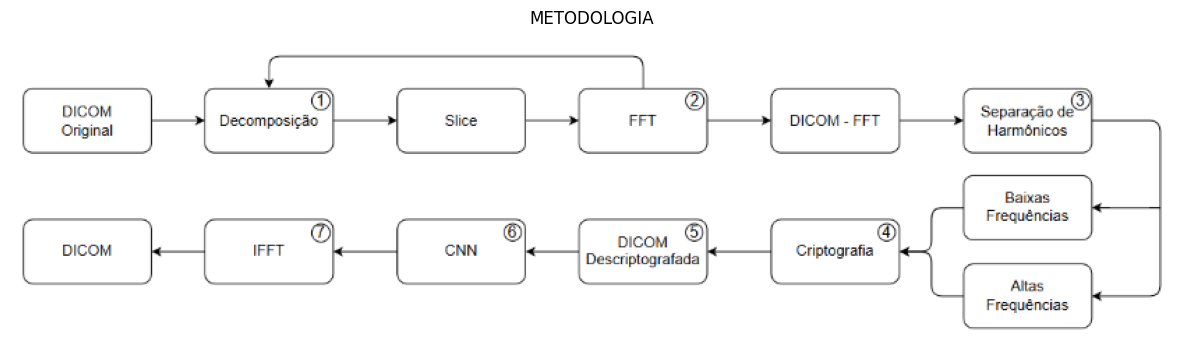

In [13]:
img = mpimg.imread(r'C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Criptografia\criptografia\medodologia.png')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.title('METODOLOGIA')
plt.axis('off')
plt.show()

In [14]:
# Carrega a chave AES salva
with open("AES_keys/aes_key.pem", "rb") as key_file:
    aes_key = key_file.read()

In [15]:
# Tempo de excecução
tempos_execucao = []
execucoes = []

for rodagem in range(1, 1501):
    inicio = time.perf_counter()
    print(f'Iniciando descriptografia AES: arquivo {rodagem}')

    caminho_entrada = f"AES_crypto_spectrum_metrics/AES_spectrum_criptografado_{rodagem}.enc"
    caminho_saida = f"AES_decrypt_spectrum_metrics/AES_spectrum_descriptografado_{rodagem}.png"

    # Lê os componentes gravados no processo de criptografia:
    with open(caminho_entrada, "rb") as enc_file:
        # No PyCryptodome, o tamanho padrão do nonce e da tag é 16 bytes (128 bits)
        nonce = enc_file.read(16)       # (number used once) valor aleatório usado na cifra AES-EAX (necessário para decifrar) -- 16 bytes
        tag = enc_file.read(16)         # hash de autenticação para validar a integridade -- 16 bytes
        ciphertext = enc_file.read()    # dados criptografados (imagem)

    cipher_aes = AES.new(aes_key, AES.MODE_EAX, nonce) # Cria o objeto de descriptografia AES-EAX com a mesma chave e nonce usado na criptografia.
    decrypted_data = cipher_aes.decrypt_and_verify(ciphertext, tag) # Descriptografa o conteúdo e verifica a integridade com a tag

    with open(caminho_saida, "wb") as out_file: # Salva os dados restaurados da imagem original.
        out_file.write(decrypted_data)

    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)

    print(f'Descriptografia AES finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

if tempos_execucao:
    print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f} segundos')

Iniciando descriptografia AES: arquivo 1
Descriptografia AES finalizada: arquivo 1
Tempo de execução: 0.00180 segundos

Iniciando descriptografia AES: arquivo 2
Descriptografia AES finalizada: arquivo 2
Tempo de execução: 0.00139 segundos

Iniciando descriptografia AES: arquivo 3
Descriptografia AES finalizada: arquivo 3
Tempo de execução: 0.00124 segundos

Iniciando descriptografia AES: arquivo 4
Descriptografia AES finalizada: arquivo 4
Tempo de execução: 0.00115 segundos

Iniciando descriptografia AES: arquivo 5
Descriptografia AES finalizada: arquivo 5
Tempo de execução: 0.00154 segundos

Iniciando descriptografia AES: arquivo 6
Descriptografia AES finalizada: arquivo 6
Tempo de execução: 0.00118 segundos

Iniciando descriptografia AES: arquivo 7
Descriptografia AES finalizada: arquivo 7
Tempo de execução: 0.00116 segundos

Iniciando descriptografia AES: arquivo 8
Descriptografia AES finalizada: arquivo 8
Tempo de execução: 0.00113 segundos

Iniciando descriptografia AES: arquivo 9

In [16]:
df_execucoes = pd.DataFrame({
    'slice': execucoes,
    'tempoExecucaoAES': tempos_execucao
})

df_execucoes.describe()

,slice,tempoExecucaoAES
count,1500.000000,1500.000000
mean,750.500000,0.001218
std,433.157015,0.000203
min,1.000000,0.000991
25%,375.750000,0.001107
50%,750.500000,0.001177
75%,1125.250000,0.001272
max,1500.000000,0.004834


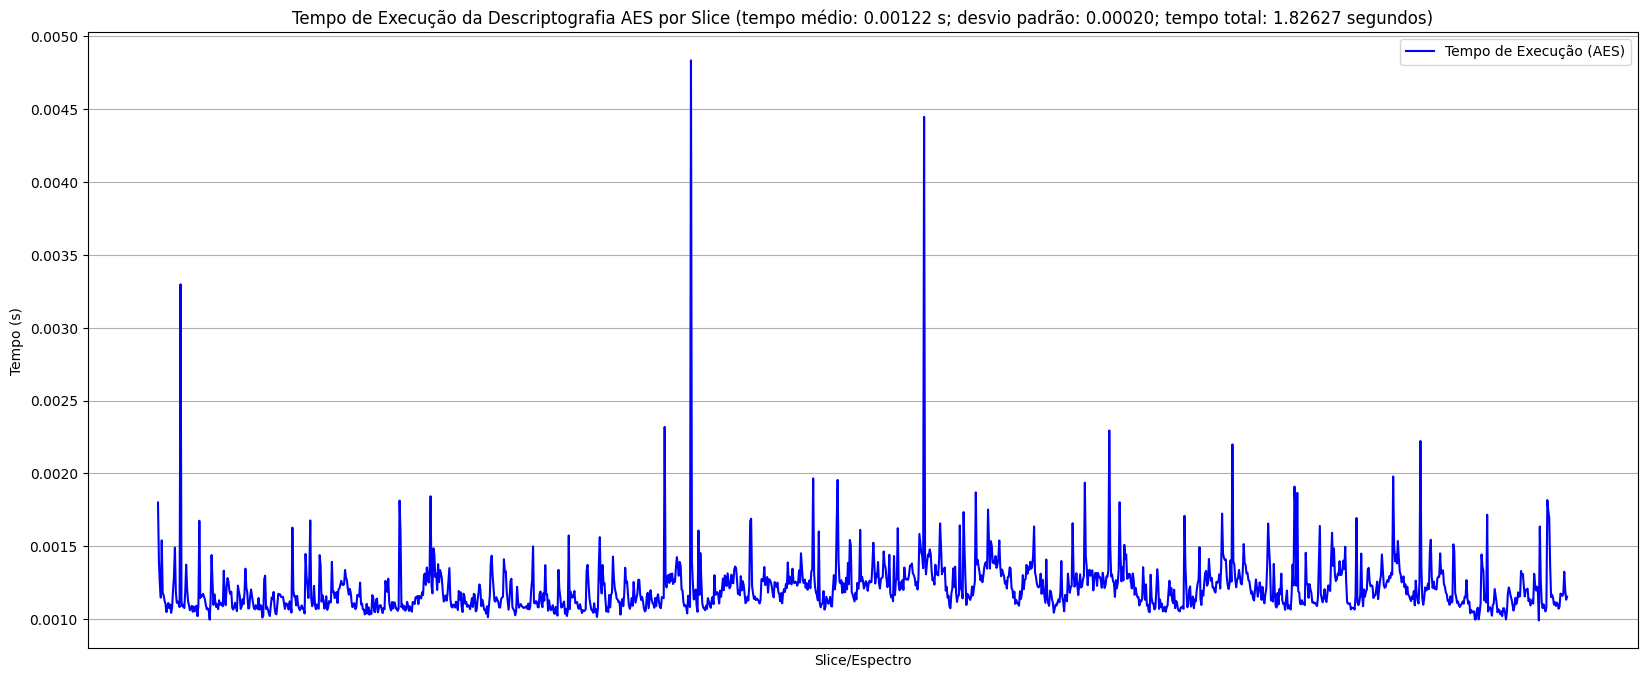

In [17]:
# Geração do gráfico
plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, linestyle='-', color='blue', label='Tempo de Execução (AES)')

# for x, y in zip(execucoes, tempos_execucao):
#     plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks([])
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Descriptografia AES por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; desvio padrão: {np.std(tempos_execucao, ddof=0):.5f}; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_aes_descriptografia_espectro.png')
plt.show()

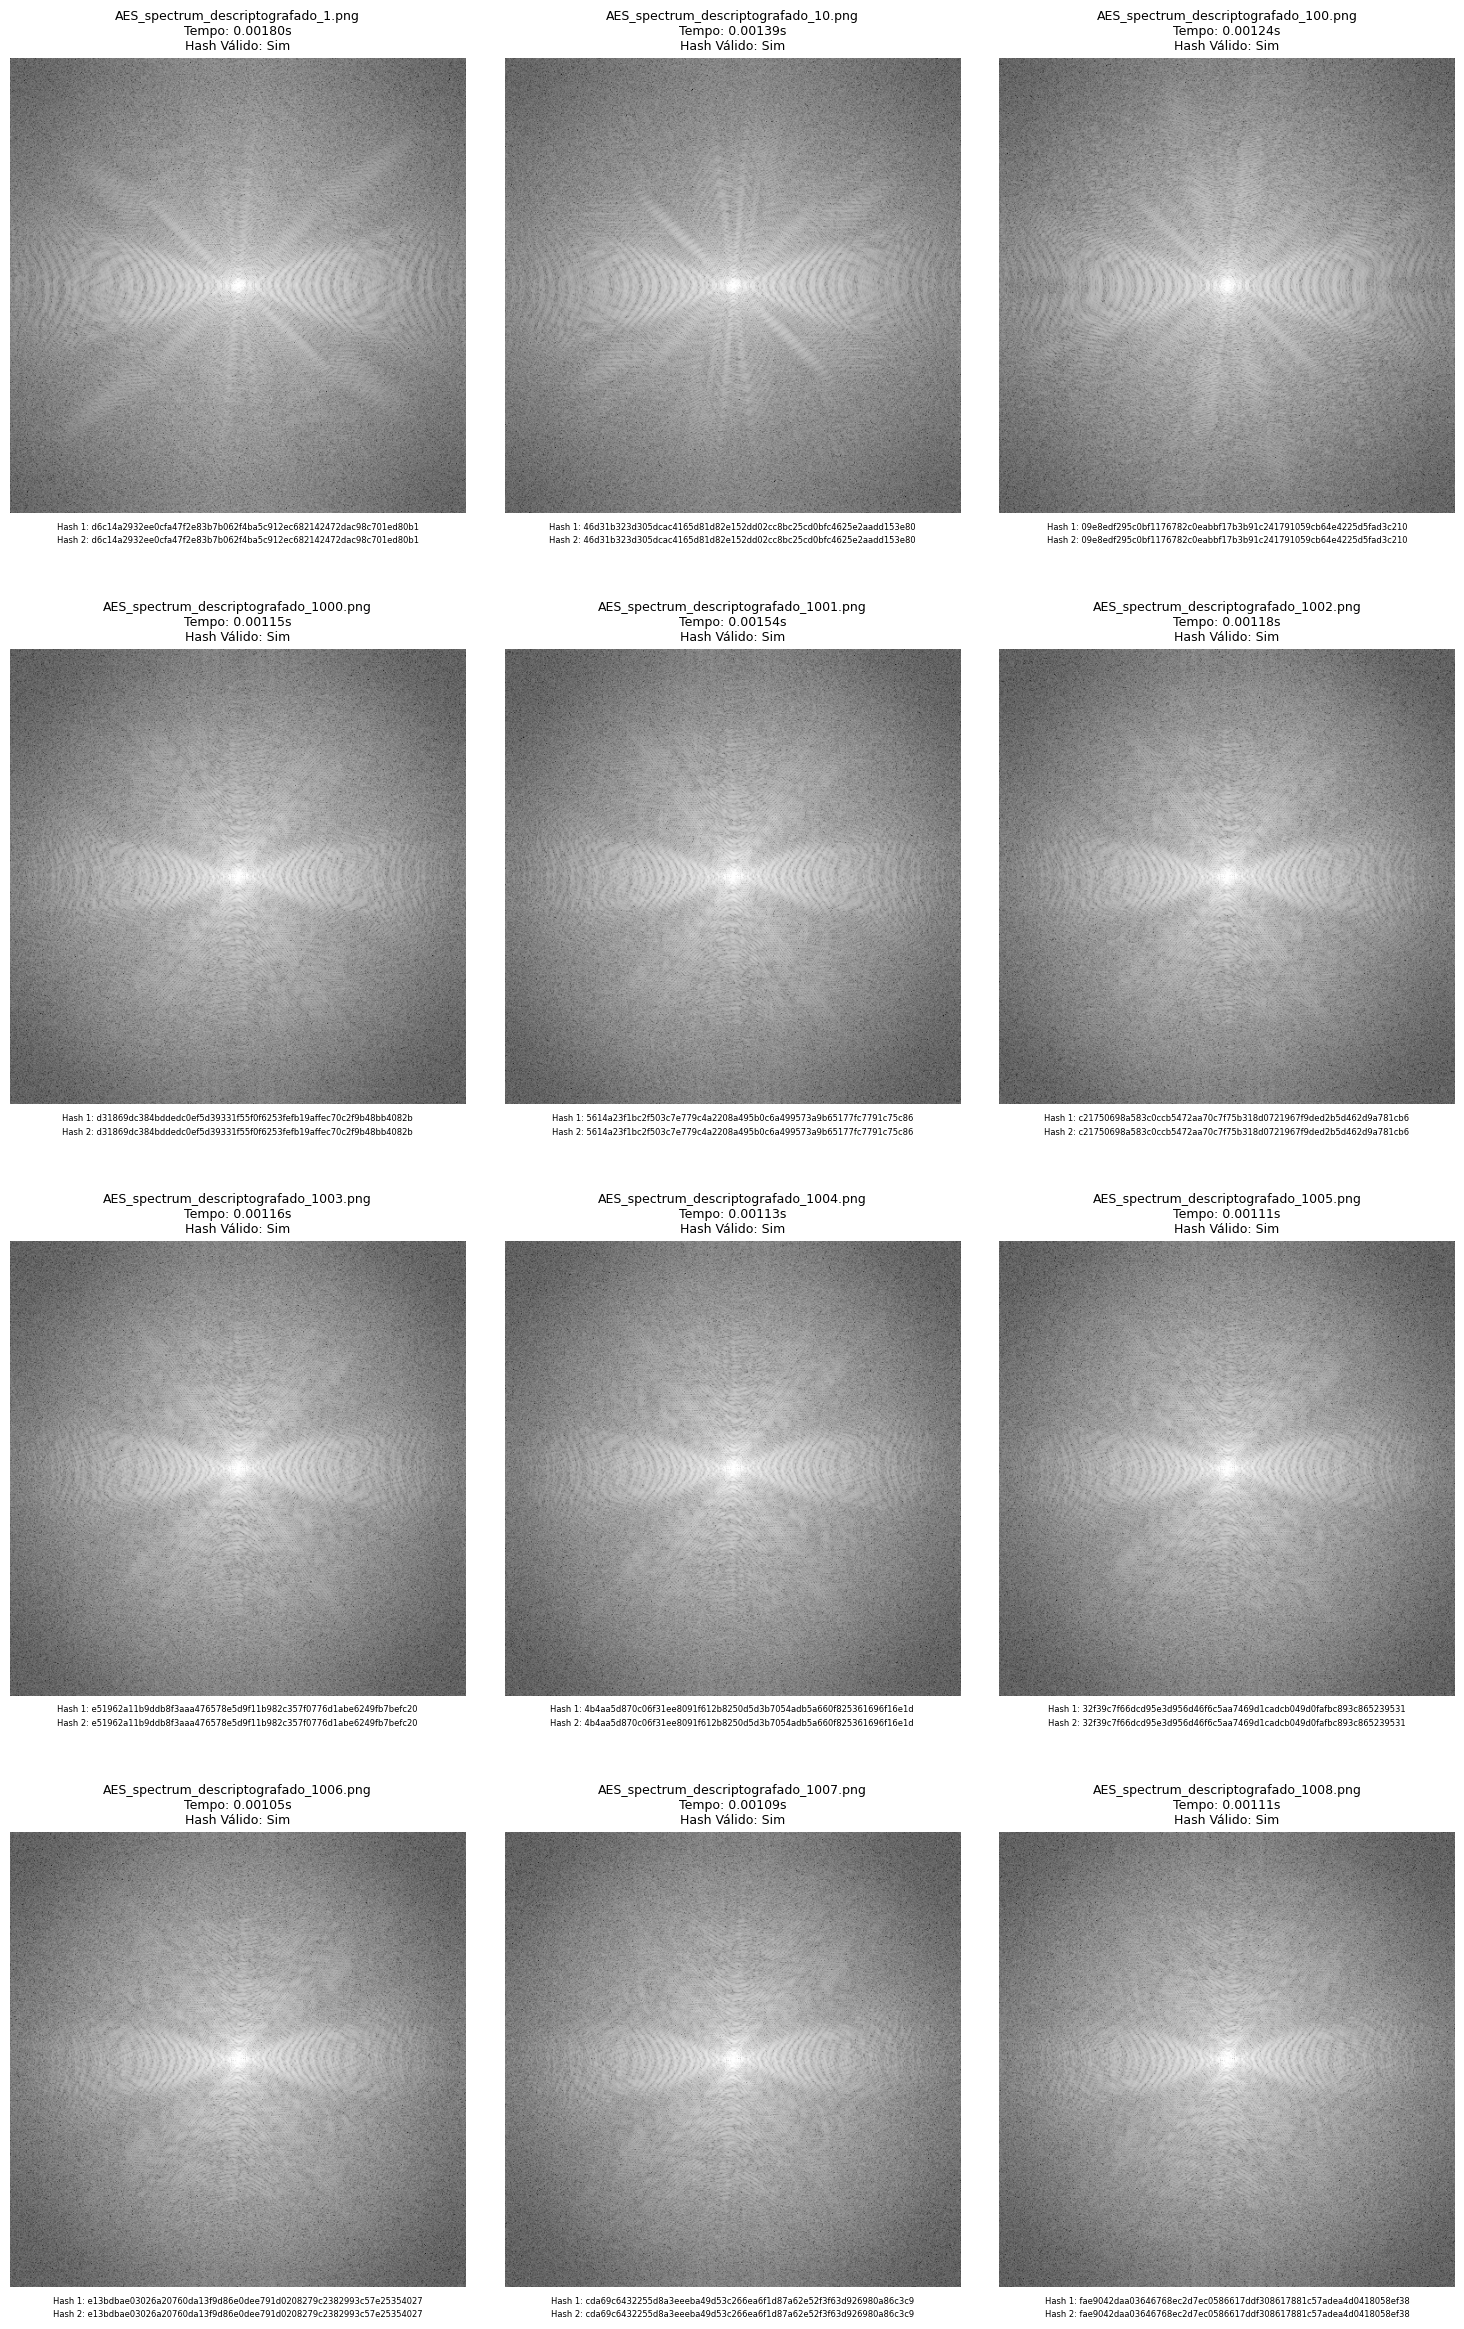

In [25]:
import os
import hashlib
import cv2
import matplotlib.pyplot as plt

def gerar_hash_sha3_256(dados):
    hash_obj = hashlib.sha3_256(dados)
    return hash_obj.hexdigest()

# Pastas com as imagens originais e descriptografadas
pasta_original = r"C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Criptografia\criptografia\DATASET_dicom_fourier_spectrum"
pasta_descriptografada = r"C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Criptografia\criptografia\AES_decrypt_spectrum_metrics"

# Lista de arquivos descriptografados
descriptografadas = [f for f in os.listdir(pasta_descriptografada) if f.endswith(".png")]

# Número máximo de imagens a serem exibidas
n = 12
cols = 3
rows = (n + cols - 1) // cols  # Arredonda para cima

# Aumenta altura da figura para comportar os hashes
plt.figure(figsize=(15, 6 * rows))

for i, nome_arquivo_desc in enumerate(descriptografadas[:n]):
    caminho_desc = os.path.join(pasta_descriptografada, nome_arquivo_desc)
    identificador = ''.join(filter(str.isdigit, nome_arquivo_desc))
    nome_arquivo_original = f"spectrum_slice_{identificador}.png"
    caminho_original = os.path.join(pasta_original, nome_arquivo_original)

    # Lê imagem descriptografada
    image = cv2.imread(caminho_desc)

    # Gera hash da imagem original, se disponível
    try:
        with open(caminho_original, "rb") as img_file:
            imagem_original = img_file.read()
        hash_original = gerar_hash_sha3_256(imagem_original)
    except FileNotFoundError:
        hash_original = "Arquivo não encontrado"

    # Gera hash da imagem descriptografada
    with open(caminho_desc, "rb") as img_file:
        imagem_desc = img_file.read()
    hash_desc = gerar_hash_sha3_256(imagem_desc)

    hash_valido = (hash_original == hash_desc) if hash_original != "Arquivo não encontrado" else False

    # Criação do subplot
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

    # Título da imagem
    titulo = f"{nome_arquivo_desc}"
    if 'tempos_execucao' in globals() and i < len(tempos_execucao):
        titulo += f"\nTempo: {tempos_execucao[i]:.5f}s"
    titulo += f"\nHash Válido: {'Sim' if hash_valido else 'Não'}"
    ax.set_title(titulo, fontsize=9)

    # Hashes abaixo da imagem
    hash_original_str = hash_original if isinstance(hash_original, str) else "Erro"
    ax.text(0.5, -0.02, f"Hash 1: {hash_original_str}", fontsize=6, ha='center', va='top', transform=ax.transAxes)
    ax.text(0.5, -0.05, f"Hash 2: {hash_desc}", fontsize=6, ha='center', va='top', transform=ax.transAxes)

# Ajuste do layout
plt.subplots_adjust(bottom=0.05)
plt.tight_layout()
plt.show()